In [3]:
import networkx as nx
import matplotlib.pylab as plt
%matplotlib inline
import random
import numpy as np

import sys
import logging
logging.basicConfig(stream=sys.stdout, level=logging.INFO)

def convert_unordered_to_ordered(edges, out_edges):
    assert len(edges) != 0
    #reserve
    out_edges = [()] * (2*len(edges))
    pend = 0 
    for edge in edges:
        out_edges[pend] = edge
        pend += 1
        if edge[0] != edge[1]:
            out_edges[pend] = (edge[1], edge[0], edge[2])
            pend += 1

    return out_edges[:pend]




#edges should be something like this
#[(1,2,5),(2,3,3})]
#or
#[(1,2,{'weight':5}),(2,3,{'weight':3})]
def chinese_whispers_ordered(ordered_edges, labels, num_iterations):
    G = nx.Graph()
    #G.add_nodes_from(nodes)
    G.add_edges_from(ordered_edges)
    #clear the list

    if len(neighbors) == 0:
        return 0

    labels = range(len(neighbors))

    neighbors = [G[i] for i in G.nodes()]

    for iter in range(len(neighbors) * num_iterations):
        idx1 = np.random.randint(0, high=len(neighbors))

        labels_to_counts = {}

        for idx2 in neighbors[idx1]:
            labels_to_counts[labels[idx2]] += G[idx1][idx2]['weight']

        #find the most common label
        best_label = labels[idx1]
        bset_score = -1.0
        for k,v in  labels_to_counts.iteritems():
            if v > best_score:
                best_score = v
                best_label = k 

        labels[idx1] = best_label
    
    #remap the labels into a contiguous range. First we find the mapping
    label_remap ={}
    for i in range(len(labels)):
        next_id = len(label_remap)
        if labels[i] not in label_remap:
            label_remap[labels[i]] = next_id

    for i in range(len(labels)):
        labels[i] = label_remap[labels[i]]

    return len(label_remap)
    


#----------------------------------------------------------------------------------------
def chinese_whispers(edges, labels, num_iterations):
    oedges = convert_unordered_to_ordered(edges, oedges)
    oedges.sort(key=lambda tup: tup[0])  # sorts in place by the 1st element
    return chinese_whispers_ordered(oedges, labels, num_iterations)


def load_edges_from_file(edge_file):
    edges = []
    with open(edge_file,'rb') as ef:
        for line in ef:
            n1, n2, w = line.strip('\n').split()
            edges.append( (int(n1), int(n2), float(w)) )
    return edges



[(1, 2, 1.0), (1, 3, 1.0), (1, 4, 1.0), (1, 5, 1.0), (1, 11, 1.0), (2, 3, 1.0), (2, 4, 1.0), (2, 5, 1.0), (2, 8, 1.0), (3, 4, 1.0), (3, 5, 1.0), (4, 5, 1.0), (6, 7, 1.0), (6, 8, 1.0), (6, 10, 1.0), (6, 11, 1.0), (7, 9, 1.0), (7, 10, 1.0), (7, 11, 1.0), (8, 9, 1.0), (8, 11, 1.0), (9, 10, 1.0), (9, 11, 1.0), (10, 11, 1.0)]


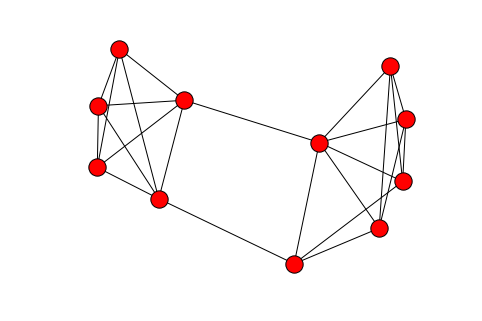

In [6]:

if __name__=='__main__':

    edges = load_edges_from_file('./graph.txt')
    print edges
    G = nx.Graph()
    G.add_weighted_edges_from(edges)
    nx.draw(G)
    plt.show()